In [1]:
from chainercv.datasets import voc_bbox_label_names
from chainercv.links import SSD300
from chainercv.visualizations import vis_bbox

In [2]:
from src import VOCBboxDataset
from src import SSDBoxCoder

In [3]:
from pathlib import Path
import numpy as np
from PIL import Image, ImageDraw

In [4]:
import torch
import torch.nn.functional as F
from torchvision import transforms

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
net = torch.load('./ssd.pth')
net.eval()
img_folder = Path('./images')

In [127]:
cat_pic = img_folder/'cat2.jpg'

In [128]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [129]:
CLS_SCORE = 0.2

In [130]:
img = Image.open(cat_pic)
sizes = (224, 224)
img_resized = img.resize(sizes)
img_transposed = np.array(img_resized).transpose(2,0,1)

x = transform(img_resized)
loc_preds, cls_preds = net(x.unsqueeze(0))

In [131]:
box_coder = SSDBoxCoder(net)
boxes, labels, scores = box_coder.decode(
            loc_preds.data.squeeze(),
            F.softmax(cls_preds.squeeze(), dim=1).data, CLS_SCORE)

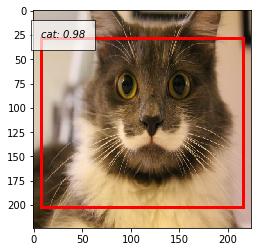

In [132]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
vis_bbox(img_transposed, boxes, labels, scores,
         label_names=voc_bbox_label_names, ax=ax1)

In [168]:
dataset      = VOCBboxDataset()
img_0, _, _  = dataset[378]

In [169]:
img = img_0
sizes = (224, 224)
img_resized = img.resize(sizes)
img_transposed = np.array(img_resized).transpose(2,0,1)

x = transform(img_resized)
loc_preds, cls_preds = net(x.unsqueeze(0))

In [170]:
box_coder = SSDBoxCoder(net)
boxes, labels, scores = box_coder.decode(
            loc_preds.data.squeeze(),
            F.softmax(cls_preds.squeeze(), dim=1).data, CLS_SCORE)

/home/baik/Code/data_science/ssd-pytorch/src/utils.py:121: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  i = order[0]


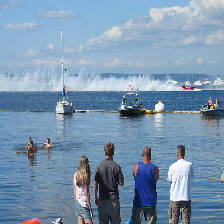

In [171]:
img_resized

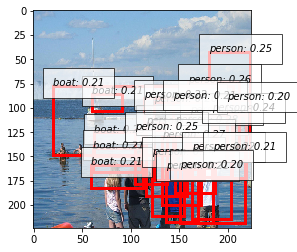

In [172]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
vis_bbox(img_transposed, boxes, labels, scores, label_names=voc_bbox_label_names, ax=ax1)